In [96]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
tran = [['A', 'B', 'C', 'D', 'E'],
        ['B', 'C'],
        ['A', 'B', 'F'],
        ['A', 'B', 'G'],
        ['A', 'F', 'H']]

te = TransactionEncoder()
tran_ar = te.fit(tran).transform(tran)
print(tran_ar)
print(te.columns_)

[[ True  True  True  True  True False False False]
 [False  True  True False False False False False]
 [ True  True False False False  True False False]
 [ True  True False False False False  True False]
 [ True False False False False  True False  True]]
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']


In [98]:
df = pd.DataFrame(tran_ar, columns=te.columns_)
print(df)

       A      B      C      D      E      F      G      H
0   True   True   True   True   True  False  False  False
1  False   True   True  False  False  False  False  False
2   True   True  False  False  False   True  False  False
3   True   True  False  False  False  False   True  False
4   True  False  False  False  False   True  False   True


In [99]:
freq = df.sum().to_frame('Frequency')
freq_sort = freq.sort_values('Frequency', ascending=False)
print(freq_sort)

   Frequency
A          4
B          4
C          2
F          2
D          1
E          1
G          1
H          1


In [100]:
freq_sort['Support'] = freq_sort['Frequency'] / len(tran)
print(freq_sort)

   Frequency  Support
A          4      0.8
B          4      0.8
C          2      0.4
F          2      0.4
D          1      0.2
E          1      0.2
G          1      0.2
H          1      0.2


In [101]:
len(tran)

5

<Axes: title={'center': 'Frequent Items'}>

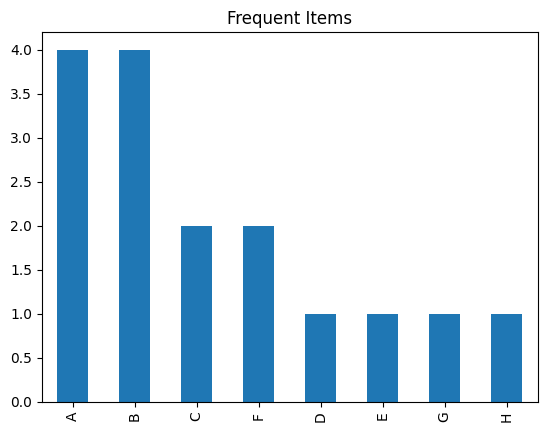

In [102]:
freq_sort['Frequency'].plot(kind='bar', title='Frequent Items')

<Axes: >

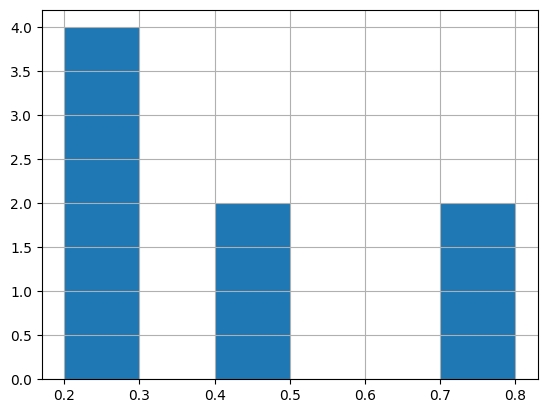

In [103]:
freq_sort['Support'].hist(bins=6)

In [104]:
freq_items = apriori(df, min_support=0.4, use_colnames=True)
print(freq_items)

   support itemsets
0      0.8      (A)
1      0.8      (B)
2      0.4      (C)
3      0.4      (F)
4      0.6   (B, A)
5      0.4   (F, A)
6      0.4   (C, B)


In [105]:
rules = association_rules(freq_items, metric='confidence', min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(B),(A),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.250000
1,(A),(B),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.250000
2,(F),(A),0.4,0.8,0.4,1.00,1.2500,0.08,inf,0.333333
3,(C),(B),0.4,0.8,0.4,1.00,1.2500,0.08,inf,0.333333


In [106]:
rules=rules[(rules['lift']>1)]
rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(F),(A),0.4,0.8,0.4,1.0,1.25,0.08,inf,0.333333
3,(C),(B),0.4,0.8,0.4,1.0,1.25,0.08,inf,0.333333


In [107]:
rules[rules.antecedents.apply(lambda x: 'F' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(F),(A),0.4,0.8,0.4,1.0,1.25,0.08,inf,0.333333


In [108]:
rules[rules.consequents.apply(lambda x: 'B' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(C),(B),0.4,0.8,0.4,1.0,1.25,0.08,inf,0.333333


In [109]:
df = pd.read_csv('d:/Online Retail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50,4.15,12680.0,France


In [110]:
df[df['Quantity']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58,1.25,17315.0,United Kingdom


In [111]:
df = df[df.Quantity > 0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50,4.15,12680.0,France


In [112]:
pd.options.display.max_rows = 1000

In [113]:
df = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum()
df

InvoiceNo  Description                        
536365     CREAM CUPID HEARTS COAT HANGER          8
           GLASS STAR FROSTED T-LIGHT HOLDER       6
           KNITTED UNION FLAG HOT WATER BOTTLE     6
           RED WOOLLY HOTTIE WHITE HEART.          6
           SET 7 BABUSHKA NESTING BOXES            2
                                                  ..
581587     PLASTERS IN TIN STRONGMAN              12
           SPACEBOY LUNCH BOX                     12
A563185    Adjust bad debt                         1
A563186    Adjust bad debt                         1
A563187    Adjust bad debt                         1
Name: Quantity, Length: 519974, dtype: int64

In [114]:
df = df.unstack()
df

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A563185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
def encode_units(x):
    if x>=1:
        return 1
    else:
        return 0

In [116]:
df = df.applymap(encode_units)
df

C:\Users\holly\AppData\Local\Temp\ipykernel_25472\1157508370.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(encode_units)


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A563185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
freq = df.sum(axis=0).to_frame('Frequency')
freq_sort = freq.sort_values('Frequency', ascending=False)
freq_sort

,Frequency
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2260
JUMBO BAG RED RETROSPOT,2092
REGENCY CAKESTAND 3 TIER,1989
PARTY BUNTING,1686
LUNCH BAG RED RETROSPOT,1564
...,...
DOORKNOB CERAMIC IVORY,1
SET/4 2 TONE EGG SHAPE MIXING BOWLS,1
DUSTY PINK CHRISTMAS TREE 30CM,1


In [119]:
freq_sort['Support'] = freq_sort['Frequency']/len(freq_sort)
freq_sort

,Frequency,Support
Description,,
WHITE HANGING HEART T-LIGHT HOLDER,2260,0.554329
JUMBO BAG RED RETROSPOT,2092,0.513122
REGENCY CAKESTAND 3 TIER,1989,0.487859
PARTY BUNTING,1686,0.413539
LUNCH BAG RED RETROSPOT,1564,0.383615
...,...,...
DOORKNOB CERAMIC IVORY,1,0.000245
SET/4 2 TONE EGG SHAPE MIXING BOWLS,1,0.000245
DUSTY PINK CHRISTMAS TREE 30CM,1,0.000245


<Axes: >

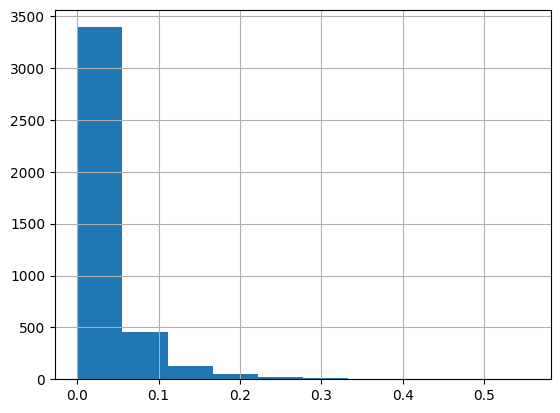

In [120]:
freq_sort['Support'].hist()

In [121]:
freq_items = apriori(df, min_support=0.01, use_colnames=True)

c:\Users\holly\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\holly\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\holly\AppData\Local\Temp\ipykernel_25472\3415392521.py", line 1, in <module>
    freq_items = apriori(df, min_support=0.01, use_colnames=True)
  File "c:\Users\holly\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\apriori.py", line 309, in apriori
    _bools = np.all(X[:, combin], axis=2)
  File "c:\Users\holly\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py", line 2504, in all
    return _wrapreduction(a, np.logical_and, 'all', axis, None, out,
  File "c:\Users\holly\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py", line 88, in _wrapreduction
    return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
KeyboardInterrupt

During handling of the above exc

In [ ]:
rules = association_rules(freq_items, metric='confidnece', min_threshold=0.6)